# Lab 3.01 - The Central Limit Theorem

Import all necessary Python libraries.

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt    

#oefening 3 Cursus Verwachtingen van X-a


In [3]:
m = 0
s = 1

print(f"1. {stats.norm.cdf(1.33,m,s)}")
print(f"2. {stats.norm.sf(1.33,m,s)}")
print(f"3. {stats.norm.cdf(-1.33,m,s)}")
print(f"4. {stats.norm.sf(-1.33,m,s)}")
print(f"5. {stats.norm.cdf(0.45,m,s)}")
print(f"6. {stats.norm.sf(-1.05,m,s)}")
print(f"7. {stats.norm.cdf(0.65,m,s)}")
print(f"8. {stats.norm.cdf(1.20,m,s) - stats.norm.cdf(-0.45,m,s)}")
print(f"9. {stats.norm.cdf(-0.10,m,s) - stats.norm.cdf(-1.35,m,s)}")
print(f"10. {stats.norm.cdf(-0.90,m,s) - stats.norm.cdf(-2.10,m,s)}")



1. 0.9082408643497193
2. 0.09175913565028077
3. 0.09175913565028077
4. 0.9082408643497193
5. 0.67364477971208
6. 0.8531409436241041
7. 0.7421538891941353
8. 0.5585751094903718
9. 0.37166417128556906
10. 0.16619570478394294


### Exercise 2 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

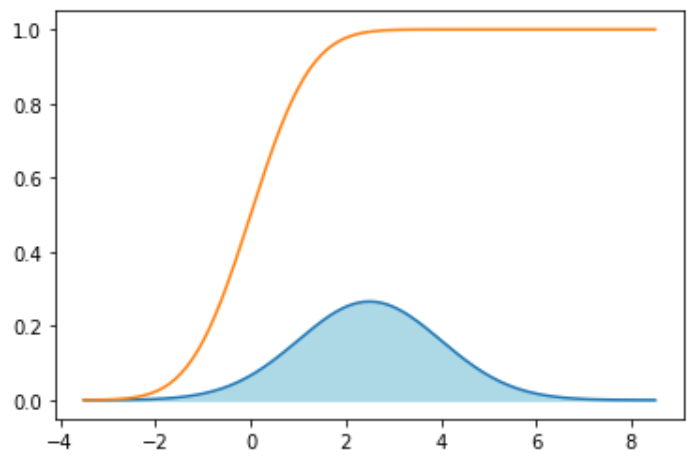

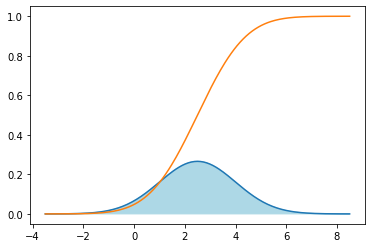

In [11]:
# Left tail probability plot
m = 2.5
s = 1.5
# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
dist_y_cdf = stats.norm.cdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
plt.plot(dist_x,dist_y_cdf)
plt.fill(dist_x,dist_y, color="lightblue")



### Exercise 3 - Student t vs normal distribution
Make a graphical plot of the probability density function and the cumulative distribution function for the Student's t-distribution with 3 degrees of freedom.  
Also make a graphical plot of the standard normal distribution, so you can compare both.

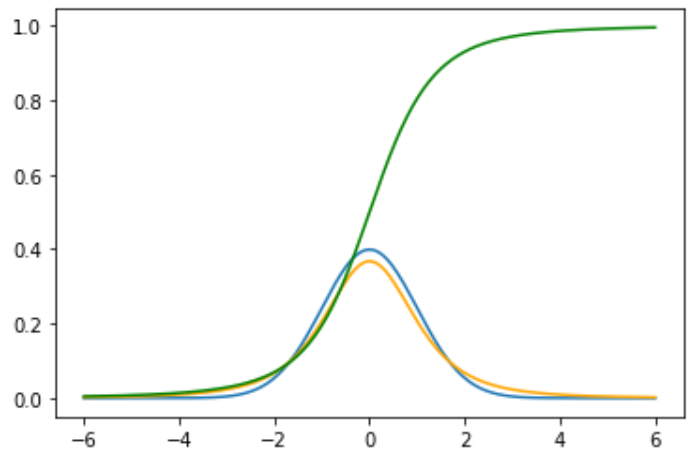

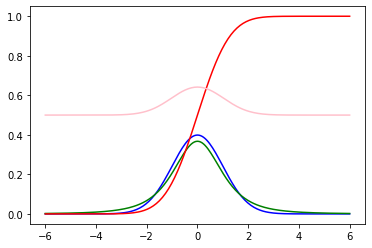

In [23]:

dist_x = np.linspace(-6, 6, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x)
dist_y_cdf = stats.norm.cdf(dist_x)

dist_t_y = stats.t.pdf(dist_x,3)
dist_t_y_cdf = stats.t.cdf(dist_y,3)


# Plot the Gauss-curve
plt.plot(dist_x, dist_y,color="blue")
plt.plot(dist_x,dist_t_y,color="green")

plt.plot(dist_x,dist_y_cdf,color="red")
plt.plot(dist_x,dist_t_y_cdf,color="pink")




### Exercise 4 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.  
Do the same for 250 and 2500 numbers.   
Notice how the real probability density approaches the theoretical one as the sample size increases.

' n = 250\nobservations = np.random.normal(m,s,n)\nobs_hist = sns.histplot(observations)\nn = 2500\nobservations = np.random.normal(m,s,n)\nobs_hist = sns.histplot(observations) '

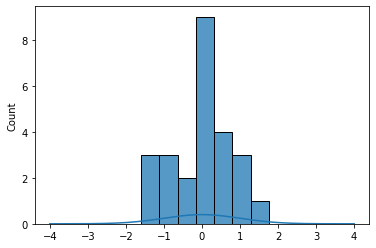

In [34]:
n = 25
m=0
s=1

observations = np.random.normal(m,s,n)
obs_hist = sns.histplot(observations)

dist_x = np.linspace(m-4*s,m+4*s,num=201)

dist_y= stats.norm.pdf(dist_x,m,s)

obs_hist.plot(dist_x,dist_y)


""" n = 250
observations = np.random.normal(m,s,n)
obs_hist = sns.histplot(observations)
n = 2500
observations = np.random.normal(m,s,n)
obs_hist = sns.histplot(observations) """


### Exercise 5 - Cholesterol 
A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.

1. Plot the probability distribution of the sample mean $\overline{x}$.
2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)



2. 0.691 
3. 0.6687123293258339
4. 0.040059156863817086


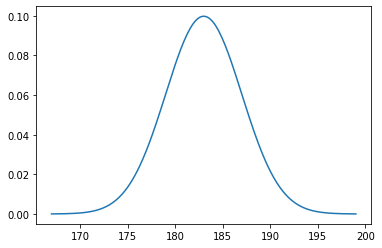

In [35]:
import math
m = 183
n = 81
s = (36/ math.sqrt(n))

#1.
# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

#2.
x = 185
print("2. %.3f " % stats.norm.cdf(x,loc = m,scale =s)) 
#3.
print(f"3. {stats.norm.cdf(185,m,s)-stats.norm.cdf(175,m,s)}")
#4.
print(f"4. {stats.norm.sf(190,m,s)}")

### Exercise 6
A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.

1. Plot the probability distribution of the sample mean.
2. Calculate the z-score for $\overline{x_1} = 15.5$  
3. Calculate the z-score for $\overline{x_2} = 23$ 
4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)


2. -2.25
3. 1.5
4. 0.819


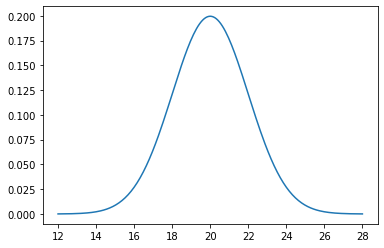

In [112]:
import math
n= 64 #sample size
m = 20 #gemiddelde
s = 16/math.sqrt(n) #standaard afwijking

#1.
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

#2.
x = 15.5
z = (x-m)/s
print(f"2. {z}")
#3.
x= 23
z = (x-m)/s
print(f"3. {z}")

#4.
print(f"4. {round(stats.norm.cdf(22,m,s)-stats.norm.cdf(16,m,s),3)}")


## Confidence Intervals

## Exercise 7 - rlanders
Load the dataset data/rlanders.csv. Use the column Money.  
We assume that the values from this sample are normally distributed around a population mean $\mu$ that is unknown, but that the standard deviation of the population is known, i.e. $\sigma = 98$.


In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
# Show the first few records of the Data Frame
df.head()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4


In [37]:
n = df["Money"].count()
m = df["Money"].mean()
print(n)
print(m)

250
500.156


Calculate a 99% confidence interval for the population mean (Answer: [484.191, 516.121]).

In [116]:
import math
s= 98
alfa = 0.01
alfa_div_2 = alfa/2

z_alfa_div_2 = stats.norm.isf(alfa_div_2)

under = m - z_alfa_div_2 * s / math.sqrt(n)
upper = m + z_alfa_div_2 * s / math.sqrt(n)

print(under, upper)


484.19084457248124 516.1211554275187


Calculate a 95% confidence interval for the population mean. (Answer =  [488.008, 512.304])

In [119]:
import math
s= 98
alfa = 0.05
alfa_div_2 = alfa/2
z_alfa_div_2 = stats.norm.isf(alfa_div_2)
under = m - z_alfa_div_2 * s / math.sqrt(n)
upper = m + z_alfa_div_2 * s / math.sqrt(n)

print(under, upper)

488.0080173668306 512.3039826331694


Suppose σ is unknown, calculate a 95% confidence interval for the population mean. (Answer = [487.319, 512.993])

In [38]:
import math
s= df["Money"].std()
alfa = 0.05
alfa_div_2 = alfa/2
z_alfa_div_2 = stats.t.isf(alfa_div_2, n-1)
print(z_alfa_div_2)
under = m - z_alfa_div_2 * s / math.sqrt(n)
upper = m + z_alfa_div_2 * s / math.sqrt(n)

print(under, upper)

1.9695368676395828
487.3189233748625 512.9930766251375


Finally, suppose the sample consists of only the first 25 observations in this dataset. Calculate a 95% confidence interval for this situation.  
(Answer = [450.291,536.669])

In [121]:
n = 25
m_sample = df["Money"][:25].mean()
s = df["Money"][:25].std()

print(n)
print(m_sample)

alfa = 0.05
alfa_div_2 = alfa / 2
t_alfa_div_2 = stats.t.isf(alfa_div_2, df=n-1)

print(alfa_div_2)
print(t_alfa_div_2)

under = m_sample - t_alfa_div_2 * s / math.sqrt(n)
upper = m_sample  + t_alfa_div_2 * s / math.sqrt(n)

print(under, upper)


25
493.48
0.025
2.063898561628021
450.29120764817304 536.6687923518269
